# Bribery Heatmap under Slashing and Non-Slashing Conditions

This notebook explores the economic threshold of validator bribery in Ethereum's proof-of-stake system, under both slashing and non-slashing scenarios. We simulate the required bribe amount (`M`) depending on:

- **X-axis**: Number of active validators (`N`)
- **Y-axis**: Length of the fork (`D`)

We generate two heatmaps:
1. **Slashing Condition**: `M = Slash Penalty`
2. **No Slashing**: `M = δ × R(N)` (discounted reward)

We assume slashing occurs during double voting, while no slashing applies if a validator hasn't voted yet.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## Parameter Definitions and Economic Assumptions
We define constants and equations based on Ethereum consensus protocol and reward formulas.

In [ ]:
# Constants and functions
delta = 0.9  # time discount factor
k = 2940.21  # reward constant, approx.
slash_fraction = 1 / 32  # base slashing penalty (simplified)
base_stake = 32  # ETH per validator

def honest_reward(N):
    return k / np.sqrt(N)

def slash_penalty():
    return slash_fraction * base_stake

## Simulation Grid
We simulate over a range of validator counts and fork lengths.

In [ ]:
# Simulation grid
validator_range = np.linspace(100_000, 1_000_000, 50)
fork_depth_range = np.arange(1, 11)  # from 1 to 10 blocks deep
X, Y = np.meshgrid(validator_range, fork_depth_range)

# Calculate rewards and bribes
reward_grid = delta * honest_reward(X)
slashing_grid = slash_penalty() * np.ones_like(X)  # constant value

## Heatmaps
Visualizing required bribe `M` under both conditions.

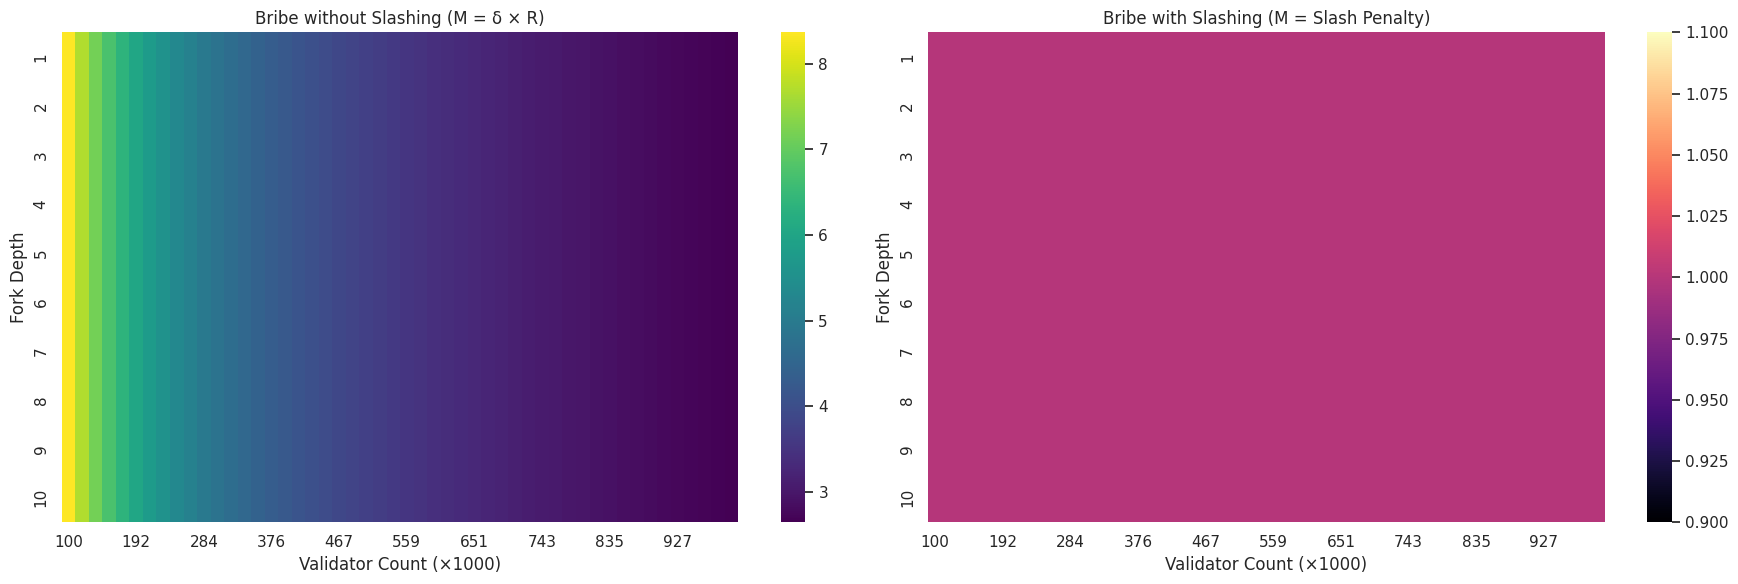

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(reward_grid, ax=axs[0], xticklabels=5, yticklabels=1, cmap='viridis')
axs[0].set_title('Bribe without Slashing (M = δ × R)')
axs[0].set_xlabel('Validator Count (×1000)')
axs[0].set_ylabel('Fork Depth')
axs[0].set_xticklabels(np.round(validator_range[::5] / 1_000).astype(int))
axs[0].set_yticklabels(fork_depth_range)

sns.heatmap(slashing_grid, ax=axs[1], xticklabels=5, yticklabels=1, cmap='magma')
axs[1].set_title('Bribe with Slashing (M = Slash Penalty)')
axs[1].set_xlabel('Validator Count (×1000)')
axs[1].set_ylabel('Fork Depth')
axs[1].set_xticklabels(np.round(validator_range[::5] / 1_000).astype(int))
axs[1].set_yticklabels(fork_depth_range)

plt.tight_layout()
plt.show()

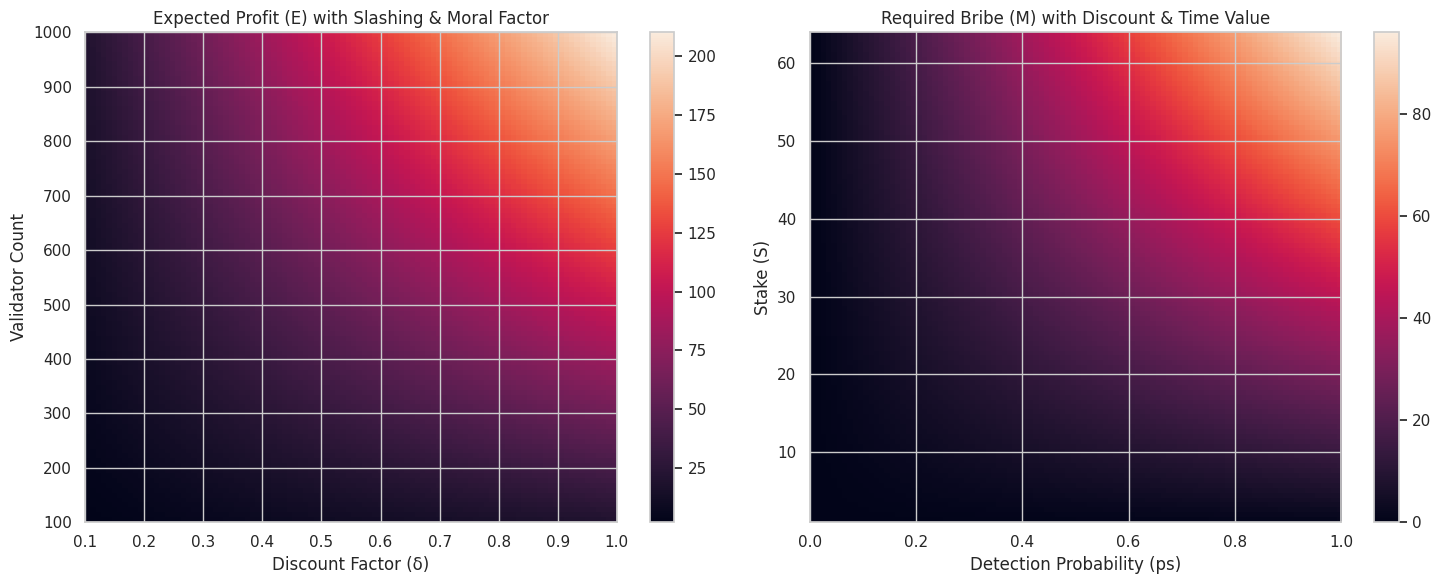

In [ ]:
validator_count_range = np.linspace(100, 1000, 100)
delta_range = np.linspace(0.1, 1, 100)
ps_range = np.linspace(0, 1, 100)
stake_range = np.linspace(1, 64, 100)

def generate_dynamic_heatmaps(alpha=0.5, ps=0.5, delta=0.9, time_value=0.1):
    X1, Y1 = np.meshgrid(delta_range, validator_count_range)
    expected_profit = X1 * Y1 * (1 - ps) * (1 - alpha)

    X2, Y2 = np.meshgrid(ps_range, stake_range)
    required_bribe = X2 * Y2 * (1 + time_value) / delta

    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    im1 = axs[0].imshow(expected_profit, aspect='auto', origin='lower',
                        extent=[delta_range.min(), delta_range.max(), validator_count_range.min(), validator_count_range.max()])
    axs[0].set_title("Expected Profit (E) with Slashing & Moral Factor")
    axs[0].set_xlabel("Discount Factor (δ)")
    axs[0].set_ylabel("Validator Count")
    fig.colorbar(im1, ax=axs[0])

    im2 = axs[1].imshow(required_bribe, aspect='auto', origin='lower',
                        extent=[ps_range.min(), ps_range.max(), stake_range.min(), stake_range.max()])
    axs[1].set_title("Required Bribe (M) with Discount & Time Value")
    axs[1].set_xlabel("Detection Probability (ps)")
    axs[1].set_ylabel("Stake (S)")
    fig.colorbar(im2, ax=axs[1])

    plt.tight_layout()
    plt.show()

generate_dynamic_heatmaps(alpha=0.3, ps=0.7, delta=0.8, time_value=0.2)

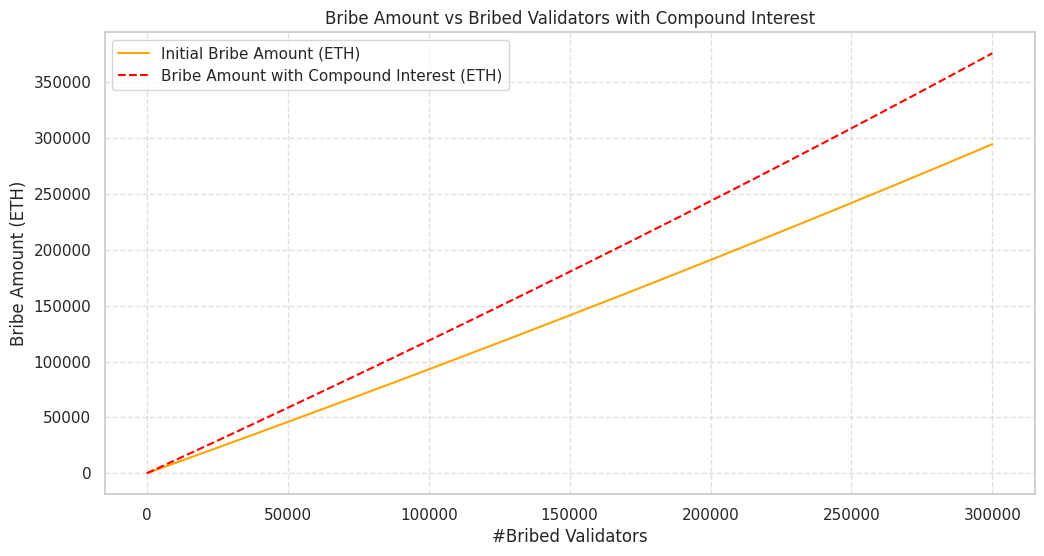

In [ ]:
stakedETHAmount = 34385053  # Total staked ETH (2025.04.01)
noOfValidators = 1074533  # Number of validators (2025.04.01)
noOfBribedValidators = 300000  # Number of bribed validators

def getAPR(noOfValidators):
    return 2940.21 / math.sqrt(noOfValidators)

oneYearRewards = [32 * getAPR(i) / 100 for i in range(noOfValidators, noOfValidators - noOfBribedValidators, -1)]
bribeAmounts = np.cumsum(oneYearRewards)

interest_rate = 0.05  # 5% annual interest rate
years = 5  # Compound interest for 5 years

bribeWithInterest = bribeAmounts * (1 + interest_rate) ** years

plt.figure(figsize=(12, 6))
plt.plot(bribeAmounts, label="Initial Bribe Amount (ETH)", color='orange')
plt.plot(bribeWithInterest, label="Bribe Amount with Compound Interest (ETH)", linestyle="--", color='red')
plt.xlabel("#Bribed Validators")
plt.ylabel("Bribe Amount (ETH)")
plt.title("Bribe Amount vs Bribed Validators with Compound Interest")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
num_validators = 1000
delta_values = np.linspace(0.0, 1.0, 5)      # Büntetés mértéke (delta)
alpha_values = np.linspace(0.1, 0.5, 5)      # Támadó részesedése (alpha)
ps_values = np.linspace(0.5, 1.0, 5)         # Megvesztegetés sikerének valószínűsége (p_s)

results = []

=for delta in delta_values:
    for alpha in alpha_values:
        for ps in ps_values:
            bribe_offer = alpha * ps
            honest_reward = 1.0
            punished_reward = (1 - delta) * honest_reward

            bribed = 0
            for _ in range(num_validators):
                if bribe_offer > punished_reward:
                    bribed += 1

            bribed_ratio = bribed / num_validators
            system_collapse = bribed_ratio > 0.33  # ha több mint 33% bribed, akkor összeomlik a rendszer

            results.append({
                'delta': round(delta, 2),
                'alpha': round(alpha, 2),
                'ps': round(ps, 2),
                'bribed_ratio': round(bribed_ratio, 2),
                'system_collapse': system_collapse
            })

df = pd.DataFrame(results)
print(df)

collapsed = df[df['system_collapse'] == True]
print("\nCases where the system collapses:")
print(collapsed)


     delta  alpha    ps  bribed_ratio  system_collapse
0      0.0    0.1  0.50           0.0            False
1      0.0    0.1  0.62           0.0            False
2      0.0    0.1  0.75           0.0            False
3      0.0    0.1  0.88           0.0            False
4      0.0    0.1  1.00           0.0            False
..     ...    ...   ...           ...              ...
120    1.0    0.5  0.50           1.0             True
121    1.0    0.5  0.62           1.0             True
122    1.0    0.5  0.75           1.0             True
123    1.0    0.5  0.88           1.0             True
124    1.0    0.5  1.00           1.0             True

[125 rows x 5 columns]

Cases where the system collapses:
     delta  alpha    ps  bribed_ratio  system_collapse
88    0.75    0.3  0.88           1.0             True
89    0.75    0.3  1.00           1.0             True
92    0.75    0.4  0.75           1.0             True
93    0.75    0.4  0.88           1.0             True
94    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def simulate_bribery(delta, alpha, ps, num_validators=1000):
    bribe_offer = alpha * ps
    honest_reward = 1.0
    punished_reward = (1 - delta) * honest_reward

    bribed = sum([
        1 if bribe_offer > punished_reward else 0
        for _ in range(num_validators)
    ])

    bribed_ratio = bribed / num_validators
    system_collapse = bribed_ratio > 0.33
    return bribed_ratio, system_collapse

def update_plot(delta, alpha, ps):
    bribed_ratio, system_collapse = simulate_bribery(delta, alpha, ps)

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(['Bribed', 'Not Bribed'], [bribed_ratio, 1 - bribed_ratio], color=['red', 'green'])
    ax.set_ylim(0, 1)
    ax.set_title(f'Bribed Ratio: {bribed_ratio:.2f} | Collapse: {"Yes" if system_collapse else "No"}')
    plt.show()

delta_slider = widgets.FloatSlider(value=0.5, min=0.0, max=1.0, step=0.05, description='delta')
alpha_slider = widgets.FloatSlider(value=0.3, min=0.1, max=0.5, step=0.05, description='alpha')
ps_slider = widgets.FloatSlider(value=0.8, min=0.5, max=1.0, step=0.05, description='p_s')

widgets.interact(update_plot, delta=delta_slider, alpha=alpha_slider, ps=ps_slider);


interactive(children=(FloatSlider(value=0.5, description='delta', max=1.0, step=0.05), FloatSlider(value=0.3, …

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def simulate_bribery(delta, alpha, ps, num_validators=1000):
    bribe_offer = alpha * ps
    honest_reward = 1.0
    punished_reward = (1 - delta) * honest_reward

    bribed = sum([
        1 if bribe_offer > punished_reward else 0
        for _ in range(num_validators)
    ])

    bribed_ratio = bribed / num_validators
    system_collapse = bribed_ratio > 0.33
    return bribed_ratio, system_collapse

def update_plot(delta, alpha, ps):
    bribed_ratio, system_collapse = simulate_bribery(delta, alpha, ps)

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(['Bribed', 'Not Bribed'], [bribed_ratio, 1 - bribed_ratio],
           color=['crimson', 'seagreen'])
    ax.set_ylim(0, 1)
    ax.set_ylabel("Ratio")
    ax.set_title(f"Bribed Ratio: {bribed_ratio:.2f} | System Collapse: {'YES' if system_collapse else 'NO'}")
    plt.show()

delta_slider = widgets.FloatSlider(value=0.5, min=0.0, max=1.0, step=0.05, description='delta')
alpha_slider = widgets.FloatSlider(value=0.3, min=0.1, max=0.5, step=0.05, description='alpha')
ps_slider = widgets.FloatSlider(value=0.7, min=0.5, max=1.0, step=0.05, description='p_s')

ui = widgets.VBox([delta_slider, alpha_slider, ps_slider])
out = widgets.interactive_output(update_plot, {'delta': delta_slider, 'alpha': alpha_slider, 'ps': ps_slider})

display(ui, out)


Output()

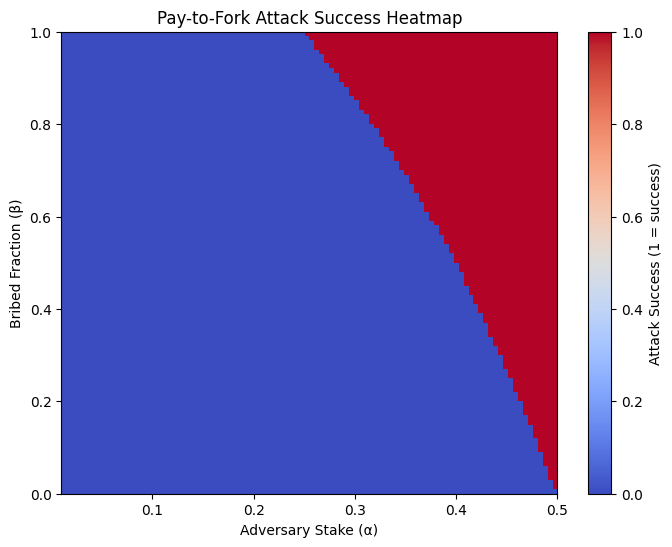

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alpha_vals = np.linspace(0.01, 0.5, 100)  # adversary stake (α)
beta_vals = np.linspace(0, 1, 100)        # bribed fraction (β)

F = 1  # fork chain reward
D = 2  # canonical chain reward

success_matrix = np.zeros((len(beta_vals), len(alpha_vals)))

for i, beta in enumerate(beta_vals):
    for j, alpha in enumerate(alpha_vals):
        lhs = F * (1 - beta) * (1 - alpha) + D * (1 - alpha)
        rhs = D * alpha + F * alpha + F * beta * (1 - alpha)
        success_matrix[i, j] = 1 if lhs < rhs else 0  # 1 = sikeres támadás

plt.figure(figsize=(8, 6))
plt.imshow(success_matrix, extent=[alpha_vals[0], alpha_vals[-1], beta_vals[0], beta_vals[-1]],
           origin='lower', aspect='auto', cmap='coolwarm')
plt.colorbar(label='Attack Success (1 = success)')
plt.xlabel('Adversary Stake (α)')
plt.ylabel('Bribed Fraction (β)')
plt.title('Pay-to-Fork Attack Success Heatmap')
plt.grid(False)
plt.show()


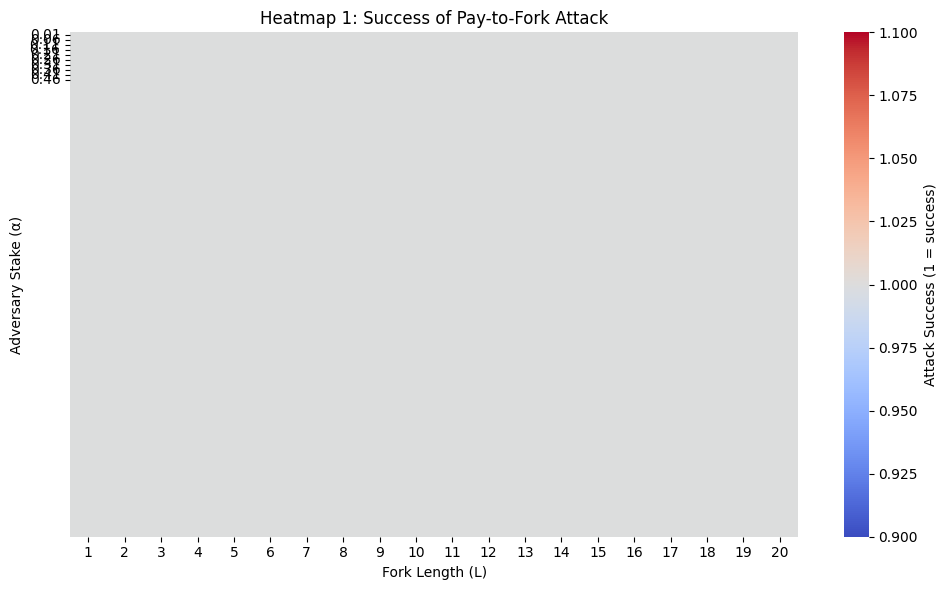

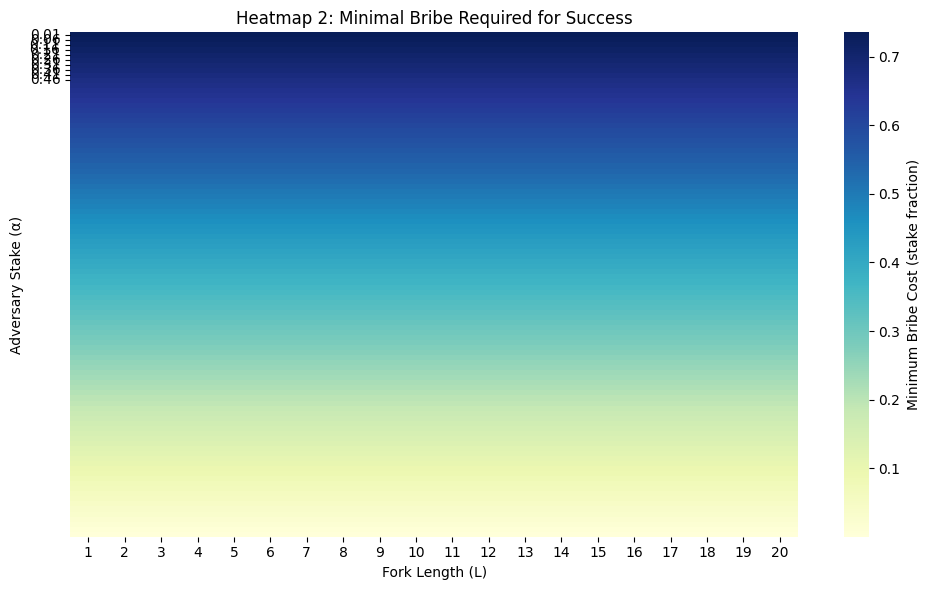

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

F = 2  # fork chain reward
D = 1  # canonical chain reward

fork_lengths = np.arange(1, 21)  # X tengely: fork hossza
alpha_vals = np.linspace(0.01, 0.5, 100)  # Y tengely: adversary stake

success_matrix = np.zeros((len(alpha_vals), len(fork_lengths)))

for i, alpha in enumerate(alpha_vals):
    for j, L in enumerate(fork_lengths):
        beta = 1
        lhs = F * (1 - beta) * (1 - alpha) * L + D * (1 - alpha) * L
        rhs = D * alpha * L + F * alpha * L + F * beta * (1 - alpha) * L
        success_matrix[i, j] = 1 if lhs < rhs else 0

bribe_cost_matrix = np.zeros((len(alpha_vals), len(fork_lengths)))

for i, alpha in enumerate(alpha_vals):
    for j, L in enumerate(fork_lengths):
        found = False
        for beta in np.linspace(0, 1, 1000):
            lhs = F * (1 - beta) * (1 - alpha) * L + D * (1 - alpha) * L
            rhs = D * alpha * L + F * alpha * L + F * beta * (1 - alpha) * L
            if lhs < rhs:
                bribe_cost_matrix[i, j] = beta * (1 - alpha)
                found = True
                break
        if not found:
            bribe_cost_matrix[i, j] = np.nan


plt.figure(figsize=(10, 6))
sns.heatmap(success_matrix, xticklabels=fork_lengths, yticklabels=np.round(alpha_vals, 2)[::10],
            cmap='coolwarm', cbar_kws={'label': 'Attack Success (1 = success)'})
plt.xlabel("Fork Length (L)")
plt.ylabel("Adversary Stake (α)")
plt.title("Heatmap 1: Success of Pay-to-Fork Attack")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(bribe_cost_matrix, xticklabels=fork_lengths, yticklabels=np.round(alpha_vals, 2)[::10],
            cmap='YlGnBu', cbar_kws={'label': 'Minimum Bribe Cost (stake fraction)'})
plt.xlabel("Fork Length (L)")
plt.ylabel("Adversary Stake (α)")
plt.title("Heatmap 2: Minimal Bribe Required for Success")
plt.tight_layout()
plt.show()


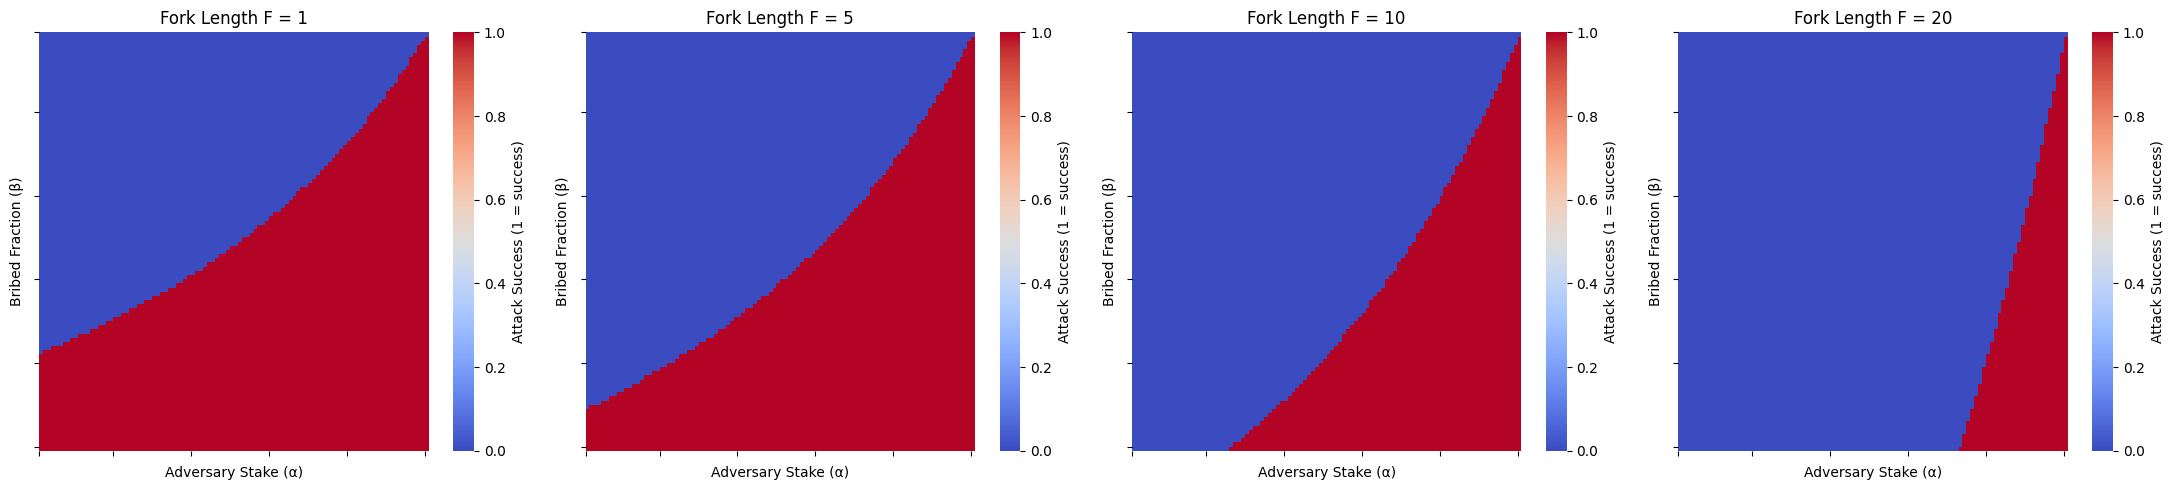

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

alpha_vals = np.linspace(0.01, 0.5, 100)
beta_vals = np.linspace(0, 1, 100)
fork_lengths = [1, 5, 10, 20]

F0 = 2
D = 1
k = 0.1

heatmaps = []

for L in fork_lengths:
    F = F0 * np.exp(-k * L)
    matrix = np.zeros((len(beta_vals), len(alpha_vals)))

    for i, beta in enumerate(beta_vals):
        for j, alpha in enumerate(alpha_vals):
            lhs = F * (1 - beta) * (1 - alpha) + D * (1 - alpha)
            rhs = D * alpha + F * alpha + F * beta * (1 - alpha)
            matrix[i, j] = 1 if lhs < rhs else 0

    heatmaps.append(matrix)

fig, axs = plt.subplots(1, len(fork_lengths), figsize=(22, 5))

xticks_idx = np.linspace(0, len(alpha_vals)-1, 6, dtype=int)
xticks = np.round(alpha_vals[xticks_idx], 2)

yticks_idx = np.linspace(0, len(beta_vals)-1, 6, dtype=int)
yticks = np.round(beta_vals[yticks_idx], 2)

for idx, ax in enumerate(axs):
    sns.heatmap(
        heatmaps[idx],
        xticklabels=xticks,
        yticklabels=yticks,
        cmap='coolwarm',
        cbar_kws={'label': 'Attack Success (1 = success)'},
        ax=ax
    )
    ax.set_title(f"Fork Length F = {fork_lengths[idx]}")
    ax.set_xlabel("Adversary Stake (α)")
    ax.set_ylabel("Bribed Fraction (β)")
    ax.set_xticks(xticks_idx)
    ax.set_yticks(yticks_idx)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
from matplotlib.colors import ListedColormap

colors = ["black", "#330066", "#762a83", "#c2a5cf", "#e7d4e8", "#f7f7f7", "#d9f0d3", "#a6dba0", "#5aae61", "#1b7837"]
cmap = ListedColormap(colors)

matrix = np.full((len(beta_vals), len(alpha_vals)), np.nan)

for i, beta in enumerate(beta_vals):
    for j, alpha in enumerate(alpha_vals):
        lhs = F * (1 - beta) * (1 - alpha) + D * (1 - alpha)
        rhs = D * alpha + F * alpha + F * beta * (1 - alpha)
        if lhs < rhs:
            matrix[i, j] = rhs - lhs  # támadás sikeres → különbséget ábrázoljuk

sns.heatmap(
    matrix,
    cmap=cmap,
    mask=np.isnan(matrix),         # csak a sikeres pontokat színezzük
    cbar_kws={'label': 'Attack Margin'},
    xticklabels=xticks,
    yticklabels=yticks,
    ax=ax,
    square=True
)


<Axes: title={'center': 'Fork Length F = 20'}>

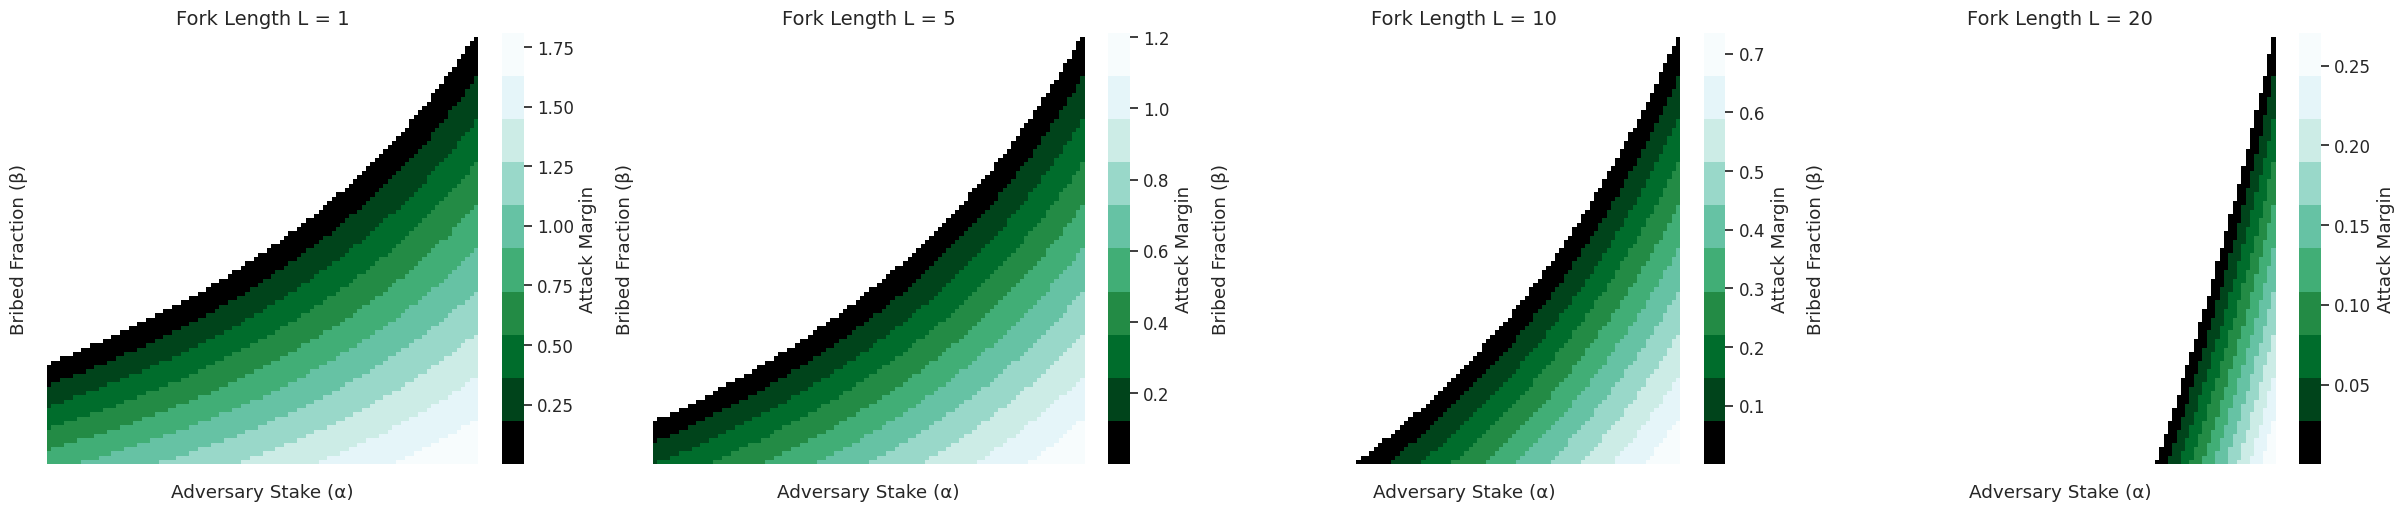

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Paraméterek
alpha_vals = np.linspace(0.01, 0.5, 100)
beta_vals = np.linspace(0, 1, 100)
fork_lengths = [1, 5, 10, 20]

F0 = 2
D = 1
k = 0.1

colors = ["black", "#00441b", "#006d2c", "#238b45", "#41ae76",
          "#66c2a4", "#99d8c9", "#ccece6", "#e5f5f9", "#f7fcfd"]
cmap = ListedColormap(colors)

heatmaps = []

for L in fork_lengths:
    F = F0 * np.exp(-k * L)
    matrix = np.full((len(beta_vals), len(alpha_vals)), np.nan)

    for i, beta in enumerate(beta_vals):
        for j, alpha in enumerate(alpha_vals):
            lhs = F * (1 - beta) * (1 - alpha) + D * (1 - alpha)
            rhs = D * alpha + F * alpha + F * beta * (1 - alpha)
            if lhs < rhs:
              matrix[i, j] = rhs - lhs

    heatmaps.append(matrix)

sns.set(style="white", font_scale=1.1)
fig, axs = plt.subplots(1, len(fork_lengths), figsize=(24, 5), constrained_layout=True)

xticks_idx = np.linspace(0, len(alpha_vals)-1, 6, dtype=int)
xticks = np.round(alpha_vals[xticks_idx], 2)

yticks_idx = np.linspace(0, len(beta_vals)-1, 6, dtype=int)
yticks = np.round(beta_vals[yticks_idx], 2)

for idx, ax in enumerate(axs):
    sns.heatmap(
        heatmaps[idx],
        cmap=cmap,
        mask=np.isnan(heatmaps[idx]),
        xticklabels=xticks,
        yticklabels=yticks,
        cbar_kws={'label': 'Attack Margin'},
        square=True,
        ax=ax
    )
    ax.set_title(f"Fork Length L = {fork_lengths[idx]}", fontsize=14)
    ax.set_xlabel("Adversary Stake (α)")
    ax.set_ylabel("Bribed Fraction (β)")
    ax.set_xticks(xticks_idx)
    ax.set_yticks(yticks_idx)
    ax.tick_params(axis='x', rotation=45)

plt.show()


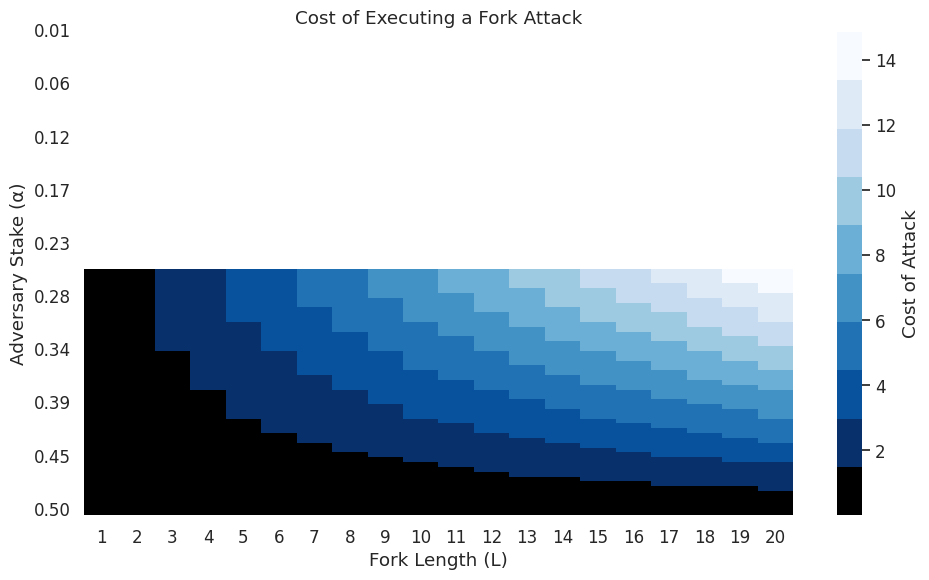

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

fork_lengths = np.arange(1, 21)               # fork hossza
alpha_vals = np.linspace(0.01, 0.5, 100)      # adversary stake

F = 1       # reward on the fork
D = 2       # reward on canonical chain
unit_cost = 1  # cost per unit bribed stake

cost_matrix = np.full((len(alpha_vals), len(fork_lengths)), np.nan)

for i, alpha in enumerate(alpha_vals):
    for j, L in enumerate(fork_lengths):
        betas = np.linspace(0, 1, 1000)
        for beta in betas:
            lhs = F * (1 - beta) * (1 - alpha) * L + D * (1 - alpha) * L
            rhs = D * alpha * L + F * alpha * L + F * beta * (1 - alpha) * L
            if lhs < rhs:
                cost_matrix[i, j] = beta * (1 - alpha) * unit_cost * L
                break

colors = ["black", "#08306b", "#08519c", "#2171b5", "#4292c6",
          "#6baed6", "#9ecae1", "#c6dbef", "#deebf7", "#f7fbff"]
cmap = ListedColormap(colors)




plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    cost_matrix,
    xticklabels=fork_lengths,
    cmap=cmap,
    mask=np.isnan(cost_matrix),
    cbar_kws={'label': 'Cost of Attack'}
)

ytick_indices = np.linspace(0, len(alpha_vals) - 1, 10, dtype=int)
ytick_labels = [f"{alpha_vals[i]:.2f}" for i in ytick_indices]
ax.set_yticks(ytick_indices)
ax.set_yticklabels(ytick_labels)

plt.xlabel("Fork Length (L)")
plt.ylabel("Adversary Stake (α)")
plt.title("Cost of Executing a Fork Attack")
plt.tight_layout()
plt.show()




  *   Dinamikus bribery game: Egy validátor nem csak ma dönt, hanem hosszabb távon figyeli, hogy mikor éri meg elfogadni egy bribet.

  *   Változó bribe-összegek: A támadó több körön keresztül próbálkozik, és növeli az ajánlatot, ha senki nem fogadja el.


  * A validátor nem tudja pontosan, hogy mennyi a slashing valószínűsége
  vagy a másik validátor mit fog tenni.
  * Bayesi döntések: A validátor várható értékeket számol, pl. hisz egy eloszlásban ($p_s \sim \beta (2,5))$
  * Ez sokkal reálisabbá tenné a modelljeidet, és a Nash-egyensúly sem lesz triviális.


  * Koordinációs játék: Ha egyedül vagyok csaló, akkor lecsapnak rám. De ha többen is csalnak, a rendszer összeomlik, és nincs slashing.